In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,r2_score,f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("adult.csv",sep=",",header=None)
df.columns = ["age", "workclass","fnlwgt", "education", "education-num", "marital_status","occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
df.replace(" ?",np.nan,inplace=True)
df.replace("? ",np.nan,inplace=True)
df.replace("?",np.nan,inplace=True)

In [3]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [6]:
df.dropna(inplace = True)

In [7]:
df.shape

(30162, 15)

In [8]:
X=df.iloc[:,1:-1]
Y=df.iloc[:,-1:]
Y.loc[Y["income"] == " <=50K", "income"] = 0
Y.loc[Y["income"] == " >50K", "income"] = 1
Y=Y.astype('int')
X.shape

(30162, 13)

In [9]:
X=pd.get_dummies(X,drop_first=True)
X.shape

(30162, 95)

In [10]:
Y.columns

Index(['income'], dtype='object')

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42069)

In [12]:
mm=MinMaxScaler()
X_train=mm.fit_transform(X_train)
X_test=mm.transform(X_test)

In [13]:
def to_print(Y_test, Y_pred):
    cm = confusion_matrix(Y_test, Y_pred)
    print("Confusion Matrix: \n", cm)
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1score = f1_score(Y_test, Y_pred)
    roc = roc_auc_score(Y_test, Y_pred)
    print ("Accuracy:", accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('f1score:', f1score)
    print('ROCAUC:', roc)

c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix: 
 [[6391  353]
 [ 928 1377]]
Accuracy: 0.858437396397392
Precision: 0.7959537572254335
Recall: 0.5973969631236442
f1score: 0.6825278810408922
ROCAUC: 0.7725270699366737
[-3.31508132 -1.95690247 -3.78775265 ... -4.21282372 -3.78775265
 -3.87123452]


c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


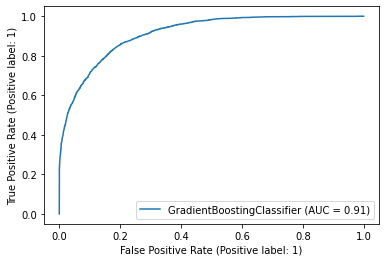

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
to_print(Y_test,Y_pred)
print((model.decision_function(X_test)))
plot_roc_curve(model, X_test, Y_test)

c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix: 
 [[6410  334]
 [1002 1303]]
Accuracy: 0.8523593767267101
Precision: 0.7959682345754429
Recall: 0.5652928416485901
f1score: 0.6610857432775241
ROCAUC: 0.7578836687483758
[-3.07153996 -1.92645705 -3.44088945 ... -3.58194152 -3.44088945
 -3.45523647]


c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


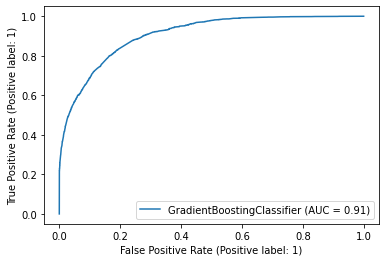

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(learning_rate=0.05)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
to_print(Y_test,Y_pred)
print((model.decision_function(X_test)))
plot_roc_curve(model, X_test, Y_test)

c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix: 
 [[6391  353]
 [ 928 1377]]
Accuracy: 0.858437396397392
Precision: 0.7959537572254335
Recall: 0.5973969631236442
f1score: 0.6825278810408922
ROCAUC: 0.7725270699366737
[-3.31508132 -1.95690247 -3.78775265 ... -4.21282372 -3.78775265
 -3.87123452]


c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


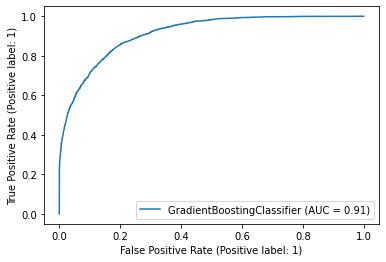

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(learning_rate=0.1)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
to_print(Y_test,Y_pred)
print((model.decision_function(X_test)))
plot_roc_curve(model, X_test, Y_test)

c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix: 
 [[6367  377]
 [ 858 1447]]
Accuracy: 0.8635208310310531
Precision: 0.7933114035087719
Recall: 0.627765726681128
f1score: 0.7008961007507871
ROCAUC: 0.7859320922848106
[-3.55351687 -2.01538574 -4.27355422 ... -4.99735964 -4.33945245
 -5.00819787]


c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


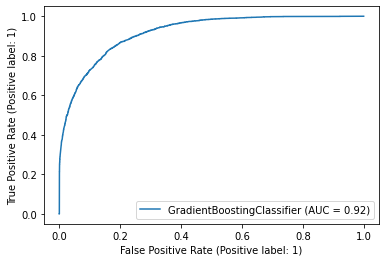

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(learning_rate=0.25)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
to_print(Y_test,Y_pred)
print((model.decision_function(X_test)))
plot_roc_curve(model, X_test, Y_test)

c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix: 
 [[6345  399]
 [ 833 1472]]
Accuracy: 0.8638523593767267
Precision: 0.7867450561197221
Recall: 0.6386117136659436
f1score: 0.7049808429118773
ROCAUC: 0.789724006299164
[-3.64436128 -2.30031844 -4.22458813 ... -5.64905049 -4.30880658
 -5.68611732]


c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


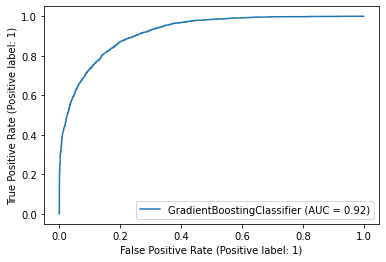

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(learning_rate=0.5)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
to_print(Y_test,Y_pred)
print((model.decision_function(X_test)))
plot_roc_curve(model, X_test, Y_test)

c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix: 
 [[6307  437]
 [ 851 1454]]
Accuracy: 0.857663830257487
Precision: 0.7689053410893707
Recall: 0.6308026030368764
f1score: 0.6930409914204003
ROCAUC: 0.7830021318861725
[-4.12254237 -2.99886688 -5.08729581 ... -6.73187931 -5.18401684
 -6.98714855]


c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


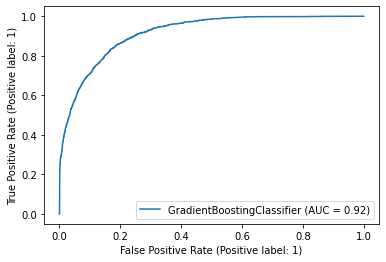

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(learning_rate=0.75)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
to_print(Y_test,Y_pred)
print((model.decision_function(X_test)))
plot_roc_curve(model, X_test, Y_test)

c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix: 
 [[6284  460]
 [ 864 1441]]
Accuracy: 0.8536854901094043
Precision: 0.758022093634929
Recall: 0.6251626898047722
f1score: 0.6852116024726581
ROCAUC: 0.7784769558157906
[-3.94896062 -2.69274177 -5.07592219 ... -6.11484714 -5.10152165
 -7.92353804]


c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


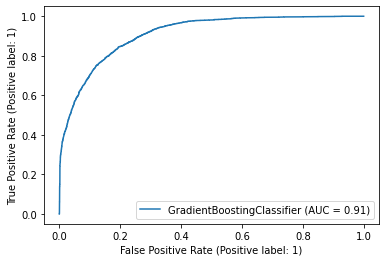

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(learning_rate=1)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
to_print(Y_test,Y_pred)
print((model.decision_function(X_test)))
plot_roc_curve(model, X_test, Y_test)

In [21]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886
education-num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522
capital-gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432
capital-loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417
hours-per-week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000
